In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('MockData.xlsx', sheetname='custsales', parse_cols='A:D, G, K')
df.dtypes

orderno               int64
dat          datetime64[ns]
quantity              int64
linetotal           float64
city                 object
catcode              object
dtype: object

When reading an Excel table, you can change al column's data type using the dtype (singular) argument. You can also map columns values to new values using the converters (plural) argument. Note the Python is always case sensitive, so column names must exactly match the Excel table's column names.

In [3]:
print(df.dtypes)

def city2region(c):
    return 'REHV' if c in ['Eindhoven', 'Waalre'] else 'RELSE'

df = pd.read_excel('MockData.xlsx',
                   sheetname='custsales',
                   parse_cols='A:D, G, K',
                   converters={'city': city2region})

df.dtypes

orderno               int64
dat          datetime64[ns]
quantity              int64
linetotal           float64
city                 object
catcode              object
dtype: object


orderno               int64
dat          datetime64[ns]
quantity              int64
linetotal           float64
city                 object
catcode              object
dtype: object

If we want to add sheets to the workbook without destroying the existing sheets, we have to use the openpyxl engine.

In [4]:
from openpyxl import load_workbook

with pd.ExcelWriter('MockData.xlsx', engine='openpyxl') as writer:
    writer.book = load_workbook('MockData.xlsx')

    (pd.cut(df.groupby('orderno')['linetotal'].sum(),
            bins=[0, 100, 150, 200, 275, 1000],
            labels=['pff', 'low', 'hmm', 'ok', 'great'])
     .value_counts()
     .sort_index()
     .to_excel(writer, sheet_name='cf1'))

Show in a plot the cumulative sales for each year.

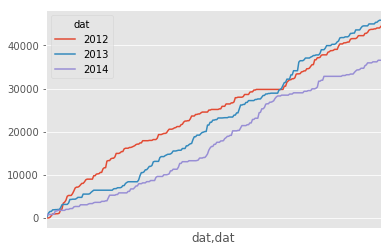

In [5]:
(df.groupby([df.dat.dt.year, df.dat.dt.month, df.dat.dt.day])['linetotal']
 .sum()
 .unstack(level=0, fill_value=0)
 .cumsum()
 .plot.line());
plt.gca().xaxis.set_major_locator(plt.NullLocator())

To smoothen the lines, we can change the resolution of the frame to months:

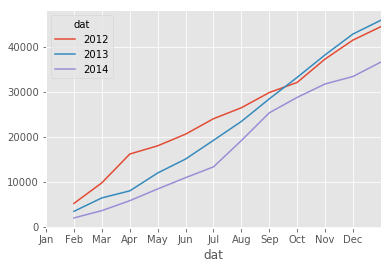

In [6]:
import calendar

(df.groupby([df.dat.dt.year, df.dat.dt.month])['linetotal']
 .sum()
 .unstack(level=0, fill_value=0)
 .cumsum()
 .plot.line())
# months = "jan feb mar apr may jun jul aug sep oct nov dec".split()
# 'Jan' == calendar.month_abbr[1]
plt.xticks(np.arange(12), calendar.month_abbr[1:13]);

In [7]:
%qtconsole
